# Convolutional Neural Network for visual recognition of Digits

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Importing the data 

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.shape

(42000, 785)

In [5]:
df_test.shape

(28000, 784)

In [6]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Preparing the training features

In [112]:
y_train = df_train['label'].values
x_train = df_train.drop('label', axis=1).values

### Converting the multi-class vector to binary matrix

In [113]:
from keras.utils.np_utils import to_categorical

In [114]:
## A classification model with multiple classes doesn't work well if you don't have classes distributed in a binary matrix.

y_train_cat = to_categorical(y_train)
print(y_train_cat.shape)
print(x_train.shape)
print("label_value: {} , categorical representation: {}".format(y_train[2],y_train_cat[2,]))

(42000, 10)
(42000, 784)
label_value: 1 , categorical representation: [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


### Standardization of features

In [105]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
xss = ss.fit_transform(x_train)

xss.shape

C:\Users\Chandan J\Anaconda3\envs\mnist\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


(42000, 784)

In [49]:
x_train = x_train/255.0

In [115]:
x_train_s = x_train.reshape(-1,28,28,1)

In [116]:
x_train_s.shape

(42000, 28, 28, 1)

In [119]:
x_train_s[:1]

array([[[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
    

### Convolutional model with fully connected network

In [165]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten, Activation
from keras.layers import BatchNormalization, Dropout
import tensorflow as tf
from keras.callbacks import EarlyStopping

K.clear_session()

model = Sequential()

model.add(Conv2D(32, (2, 2), strides = (1,1), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), padding = "same"))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(40, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(30, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))

adam = Adam(lr=0.01, decay=0.01)

earlystopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

model.compile(loss='categorical_crossentropy',
              optimizer= adam,        
              metrics=['accuracy'])

In [166]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               752760    
_________________________________________________________________
batch_normalization_1 (Batch (None, 120)               480       
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
__________

In [167]:
y_train_cat = to_categorical(y_train)
h = model.fit(x_train_s, y_train_cat, batch_size=128, epochs=30, verbose=1, validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 36s - loss: 0.2468 - acc: 0.9250 - val_loss: 0.0887 - val_acc: 0.9731
Epoch 2/30
37800/37800 [==============================] - 34s - loss: 0.0777 - acc: 0.9772 - val_loss: 0.0643 - val_acc: 0.9829
Epoch 3/30
37800/37800 [==============================] - 36s - loss: 0.0518 - acc: 0.9848 - val_loss: 0.0597 - val_acc: 0.9805
Epoch 4/30
37800/37800 [==============================] - 35s - loss: 0.0368 - acc: 0.9890 - val_loss: 0.0546 - val_acc: 0.9838
Epoch 5/30
37800/37800 [==============================] - 35s - loss: 0.0298 - acc: 0.9913 - val_loss: 0.0551 - val_acc: 0.9829
Epoch 6/30
37800/37800 [==============================] - 36s - loss: 0.0242 - acc: 0.9929 - val_loss: 0.0592 - val_acc: 0.9829
Epoch 7/30
37800/37800 [==============================] - 36s - loss: 0.0211 - acc: 0.9933 - val_loss: 0.0564 - val_acc: 0.9833
Epoch 8/30
37800/37800 [==============================]

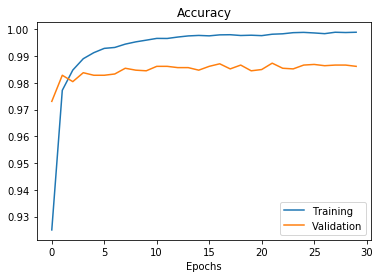

In [168]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [174]:
x_test_s = df_test.values.reshape(-1,28,28,1)
x_test_s.shape

(28000, 28, 28, 1)

In [175]:
prediction = model.predict(x_test_s)

In [176]:
prediction.shape

(28000, 10)

In [177]:
from numpy import argmax

y_pred = np.zeros(shape=(len(prediction),2),dtype = int)
for i in range(0,len(prediction)):
    y_pred[i][0] = i+1
    y_pred[i][1] = argmax(prediction[i,:])
y_pred    

array([[    1,     2],
       [    2,     0],
       [    3,     9],
       ..., 
       [27998,     3],
       [27999,     9],
       [28000,     2]])

In [178]:
type(y_pred)
y_pred.shape

(28000, 2)

In [179]:
(df_test[0:1].values).reshape(1,28,28,1)

array([[[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
    

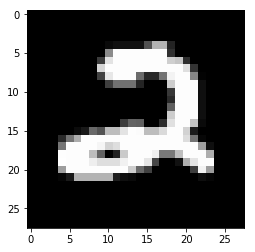

In [180]:
plt.imshow((df_test[0:1].values).reshape(28,28), cmap='gray')

### Generates the final file for submission

In [181]:
download_dir = "submission.csv" #where you want the file to be downloaded to 

csv = open(download_dir, "w") 
#"w" indicates that you're writing strings to the file

columnTitleRow = "ImageId,Label"
csv.write(columnTitleRow + '\n')

for t in range(0,len(y_pred)):
    ids = y_pred[t][0]
    pred = y_pred[t][1]
    row = str(ids) 
    csv.write(row)
    csv.write(",")
    row = str(pred)
    csv.write(row)
    csv.write("\n")

csv.close()

### To validate with the same data present in keras
##### Cross validation done to duplicate a real time scenario

In [82]:
from keras.datasets import mnist

In [89]:
(tx_train, ty_train), (tx_test, ty_test) = mnist.load_data('C:/Users/Chandan J/Downloads/mnist.npz')

In [125]:
from keras.utils.np_utils import to_categorical

In [171]:
y_train_cat = to_categorical(ty_train)
y_test_cat = to_categorical(ty_test)
print(y_train_cat.shape)
print(ty_train.shape)
print("label_value: {} , categorical representation: {}".format(y_train[2],y_train_cat[2,]))

(60000, 10)
(60000,)
label_value: 1 , categorical representation: [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


In [172]:
t_train_x = tx_train.reshape(-1, 28, 28, 1)
t_test_x = tx_test.reshape(-1, 28, 28, 1)

In [173]:
test_accuracy = model.evaluate(t_train_x, y_train_cat)[1]
test_accuracy

60000/60000 [==============================] - 18s    


0.99260000000000004